K-Nearest Neighbors (KNN) is a supervised learning algorithm that classifies a data point based on the majority class of its K closest neighbors using a distance metric like Euclidean distance:

***“Birds of a feather flock together” — the core idea behind K-Nearest Neighbors.***


 Euclidean Distance Formula
$$
d(x, x_i) = \sqrt{ \sum_{j=1}^{n} (x_j - x_{ij})^2 }
$$



Example: If a new flower’s measurements are closest to 3 known Setosa samples, KNN (with K=3) predicts it as Setosa.

###  K-Nearest Neighbors (KNN) — Worked-Out Example

We are given a small labeled dataset:

| Point | Feature 1 (x₁) | Feature 2 (x₂) | Label   |
|-------|----------------|----------------|---------|
| A     | 1              | 1              | Red     |
| B     | 2              | 2              | Red     |
| C     | 3              | 3              | Blue    |
| D     | 6              | 5              | Blue    |

We want to classify a new point:  
**P = (2, 3)** using **KNN with K = 3**

---

###  Step 1: Euclidean Distance Formula

$$
d(x, x_i) = \sqrt{(x_1 - x_{i1})^2 + (x_2 - x_{i2})^2}
$$

---

###  Step 2: Calculate Distances

- To A (1,1):  
  $$
  d = \sqrt{(2 - 1)^2 + (3 - 1)^2} = \sqrt{5} \approx 2.24
  $$

- To B (2,2):  
  $$
  d = \sqrt{(2 - 2)^2 + (3 - 2)^2} = \sqrt{1} = 1.00
  $$

- To C (3,3):  
  $$
  d = \sqrt{(2 - 3)^2 + (3 - 3)^2} = \sqrt{1} = 1.00
  $$

- To D (6,5):  
  $$
  d = \sqrt{(2 - 6)^2 + (3 - 5)^2} = \sqrt{20} \approx 4.47
  $$

---

###  Step 3: 3 Nearest Neighbors

| Neighbor | Distance | Label |
|----------|----------|--------|
| B        | 1.00     | Red    |
| C        | 1.00     | Blue   |
| A        | 2.24     | Red    |

---

###  Step 4: Majority Vote

- Red: 2 votes  
- Blue: 1 vote

---

### Final Prediction

The new point **(2, 3)** is classified as:

$$
\boxed{\text{Red}}
$$


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target column (0 = malignant, 1 = benign)
df['target'] = data.target

# Show the first 10 rows
df.head(500)




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,14.87,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.04951,0.1487,0.05748,...,28.48,103.90,783.6,0.1216,0.1388,0.1700,0.1017,0.2369,0.06599,1
496,12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,0.1641,0.06854,...,22.15,95.29,633.7,0.1533,0.3842,0.3582,0.1407,0.3230,0.10330,1
497,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,...,24.34,92.82,607.3,0.1276,0.2506,0.2028,0.1053,0.3035,0.07661,1
498,18.49,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.09183,0.1832,0.06697,...,22.88,146.40,1600.0,0.1412,0.3089,0.3533,0.1663,0.2510,0.09445,0


#  Plot The Data

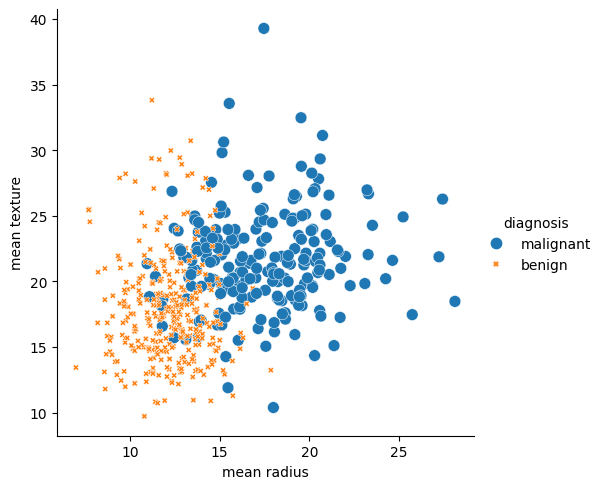

In [ ]:
import seaborn as sns

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data.target
#adding one more column where target = 0 -> malignant and target = 1 ->benign
df['diagnosis']=df['target'].map({0:'malignant',1:'benign'})


sns.relplot(data=df,x='mean radius' , y='mean texture', hue='diagnosis', style='diagnosis', size ='diagnosis')

# Normalization

As the distance formula depends upon how features are used, if certain feature have much larger value than the others, the distance measurement will be highly dominated by the larger values.

we have to rescale the features such that they all contribute equally.

Two ways to normalize features:


1.   ***Min-max normalization***

 formula we use for this normalization
 $$
 x_{new}= \frac{x-min(x)}{max(x)-min(x)}
 =[0,1]
 $$

2.   ***z-transformation***

  it centers the data around 0 and scales it to have unit variance (SD =1)

$$
 z=\frac{x- \mu}{σ}
$$

where, $\mu$ = mean of the features

  σ = Standard Deviation


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn import preprocessing


correlation=(df.drop(columns=['diagnosis']).corr())

print(correlation['target'].abs().sort_values(ascending=False))



target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

So from the out put we are going to use

* worst concave points       0.793566

* worst perimeter            0.782914

* mean concave points        0.776614

In [ ]:
features = np.array(df[["worst concave points","worst perimeter","mean concave points"]])
target = np.array(df.target)



#Normalization

features_normalized=preprocessing.MinMaxScaler().fit_transform(features)
print(features_normalized)

[[0.91202749 0.66831017 0.73111332]
 [0.63917526 0.53981772 0.34875746]
 [0.83505155 0.50844166 0.63568588]
 ...
 [0.48728522 0.3799492  0.26351889]
 [0.91065292 0.66831017 0.7554672 ]
 [0.         0.04357787 0.        ]]


Make sense as all the values are in between 0 and 1

In [ ]:
feature_train,feature_test,target_train,target_test = train_test_split(features_normalized,target,test_size=0.3)

model = KNeighborsClassifier(n_neighbors=20)
fitted_model = model.fit(feature_train,target_train)
predictions = fitted_model.predict(feature_test)
print("test features are available for",len(feature_test),"items\n",predictions,"\nTotal number of predictions made", len(predictions))

test features are available for 171 items
 [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0
 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1
 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0
 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0
 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1] 
Total number of predictions made 171


* n_neighbors is the number of nearest data points KNN uses to decide the class of a new data point.
* n_neighbors controls how many neighbors vote. Tune it carefully — too low means overfitting, too high means oversmoothing.

Accuracy Score 0.9239766081871345
Confusion Matrix [[ 52   7]
 [  6 106]]


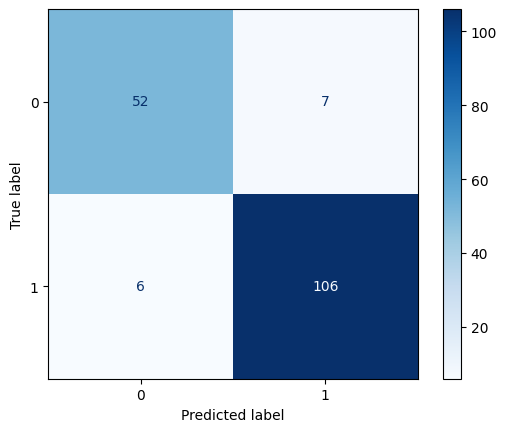

In [ ]:
print("Accuracy Score", accuracy_score(target_test,predictions))
print("Confusion Matrix", confusion_matrix(target_test,predictions))

ConfusionMatrixDisplay.from_predictions(target_test,predictions, cmap='Blues')

# Use cross validation to find the optimal number of neighbors to consider

In [ ]:
k_values = range(1,int(np.sqrt(len(features_normalized))))
cv_scores = []

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,features_normalized,target,cv=5,scoring='accuracy')
  cv_scores.append(scores.mean())

print(cv_scores)

[np.float64(0.9192206179164725), np.float64(0.9139108834031984), np.float64(0.9262226362366093), np.float64(0.9332557056357708), np.float64(0.9367644775655954), np.float64(0.935010091600683), np.float64(0.9367489520260829), np.float64(0.9349945660611707), np.float64(0.9367644775655954), np.float64(0.9297003570874087), np.float64(0.9349945660611707), np.float64(0.9314702685918336), np.float64(0.9385188635305077), np.float64(0.9367489520260829), np.float64(0.9402732494954199), np.float64(0.9385188635305075), np.float64(0.9437975469647568), np.float64(0.9402732494954199), np.float64(0.9455519329296692), np.float64(0.9437820214252446), np.float64(0.9437820214252446), np.float64(0.9437975469647568)]


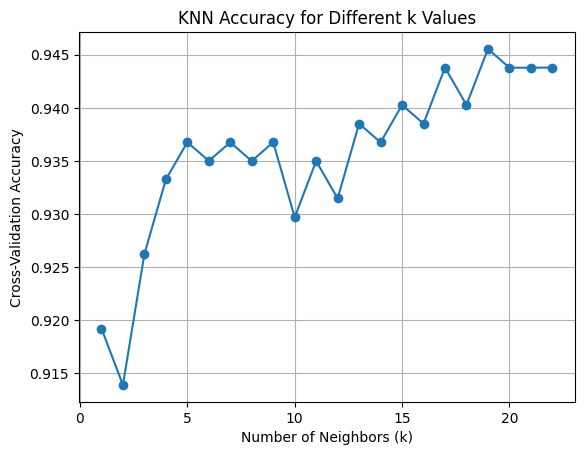

In [ ]:
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.grid(True)
plt.show()


In [ ]:
optimal_k = np.argmax(cv_scores) + 1  # +1 because range starts at 1
print(f"Optimal number of neighbors: {optimal_k}")
print(f"Best cross-validated accuracy: {cv_scores[optimal_k - 1]:.4f}")


Optimal number of neighbors: 19
Best cross-validated accuracy: 0.9456
